In [48]:
#!/usr/bin/env python

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib
# import seaborn as sns
import sys
import datetime
import glob
from itertools import cycle
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import FixedLocator
from matplotlib.ticker import FixedFormatter
# %matplotlib inline

import warnings
import matplotlib.cbook
import matplotlib as mpl
import random



In [49]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath,mathptmx}']

warnings.filterwarnings('ignore')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams.update({'figure.max_open_warning': 0})
mpl.rcParams.update({"font.size": 34,"figure.autolayout": True})
mpl.rc("axes", edgecolor="0.8")
plt.rcParams["font.family"] = "Times New Roman"

legendsize = 40

red = "#a93226"
blue = "#2874a6"
green = "#1e8449"
purple = '#800080'
black = "#000000"

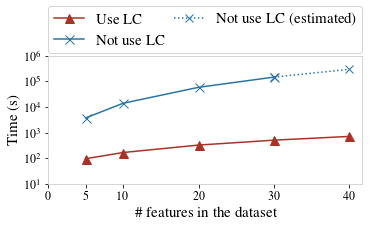

In [65]:
def plot_admm():
    # x represents the dimensions of the dataset.
    x = [5, 10, 20, 30, 40]
    # Local Compute Time, no estimates
    y1 = [95.21107599, 166.3214619, 324.5535871, 504.5941834, 706.8332509]
    y2 = [3736.564337, 14038.20616, 58684.93763, 146994.9658, 296647.1091]
    malicious_offline = [3698399.896,686845.6949,1373691.39,3488435.725,2747382.78]
            
    # Log scale
    plt.yscale('log')

    plt.plot(x, y1, marker="^", linestyle="solid", markersize=9, color=red, label="Use LC")
    plt.plot(x[:-1], y2[:-1], marker='x', linestyle="solid", markersize=9, color=blue, label="Not use LC")
    plt.plot([30, 40], [146994.9658, 296647.1091], marker='x', linestyle=':', markersize=8, color=blue, label="Not use LC (estimated)")

    axes = plt.gca()
    axes.set_ylim(0, 350500)
    #axes.set_yscale('log')

    plt.legend(ncol=2, columnspacing=0.2, fontsize=15, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0)

    plt.ylabel("Time (s)",fontsize=15)
    
    plt.yticks([10, 100, 1000, 10000, 100000, 1000000], fontsize=12)
    
    plt.xlabel("\# features in the dataset", fontsize=15)
    xts = [0, 5, 10, 20, 30, 40]
    plt.xticks(xts, ["$0$", "$5$", "$10$", "$20$", "$30$", "$40$"], fontsize=12)

    fig = plt.gcf()
    fig.set_size_inches(6, 3.34, forward=True)

    pp = PdfPages('ADMM_Local_Compute.pdf')
    plt.savefig(pp, format='pdf', bbox_inches='tight', dpi=fig.dpi)
    pp.close()
    plt.show()
plot_admm()

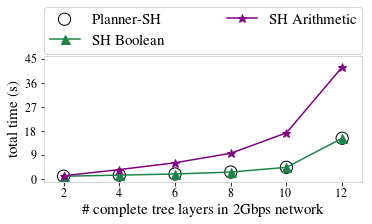

In [51]:




# Vary the number of layers
def plot_dt_total_layers():
    #plt.yscale('log')
    x = [2, 4, 6, 8, 10, 12]
    # SH ag-mpc
    # y1 = [0.77488, 1.06147, 1.62392, 2.20905, 3.08403, 5.62155]
    y1 = [1.0592959999999998, 1.4780049999999998, 1.896682, 2.617812, 4.388643, 15.281220000000001]
    y2 = [1.240655181, 3.539709499, 6.097950934, 9.655830703, 17.29263168, 41.91874337]
    
    # malicious ag-mpc
    # y3 = [1.505, 1.925, 2.398, 3.235, 6.829, 19.425]  
    y3 = [1.794725, 2.297041, 2.7478599999999997, 3.751252, 8.487646999999999, 22.98759]
    # malicious SCALE-MAMBA
    y4 = [7.664826, 41.484501, 142.780667, 495.075477, 1831.210504, 7083.086218]

    triples_bits = [380 + 2200, 2052 + 13096, 6612 + 48056, 21188 + 172744, 74292+ 649816,279972 + 2529896]
    y5_offline = [triples_bits[i] / 120963.16923076924 for i in range(len(triples_bits))]
    y5_online = [0.8111826666666662, 3.429572666666666, 6.047962666666666, 8.666352666666667, 11.284742666666665, 13.903132666666666]
    y5 = [y5_offline[i] + y5_online[i] for i in range(len(y5_offline))]

    
    y6 = [1.3605471037182009, 1.415310272015657, 1.6343629452054809, 2.510573637964776, 6.015416409001959, 20.03478749315069]

    plt.plot(x, y1, linestyle='solid', marker="^", markersize=9, color=green, label="SH Boolean")
    plt.plot(x, y2, linestyle='solid', marker='*', markersize=9, color=purple, label="SH Arithmetic")
    #plt.plot(x, y3, linestyle='solid', marker="s", markersize=9, color=red, label="Malicious Boolean")
    #plt.plot(x, y4, linestyle='solid', marker='o', markersize=9, color=blue, label="Malicious Arithmetic")
    plt.scatter(x, y1, s=150, facecolors='none', edgecolors='black', label="Planner-SH")
    #plt.plot(x, y5, linestyle='dotted', marker='*', markersize=9, color=blue, label="SH Arithmetic (model)")
    #plt.plot(x, y6, linestyle='dotted', marker='*', markersize=9, color=blue, label="SH Boolean (model)")

    
    

    axes = plt.gca()
    #axes.set_ylim(0, 8000)
    #plt.yticks([0.1, 1,10, 100, 1000, 10000], fontsize=12)
    handles, labels = axes.get_legend_handles_labels()
    axes.legend([handles[-1]] + handles[:-1], [labels[-1]] + labels[:-1], ncol=2, columnspacing=0.2, fontsize=15, bbox_to_anchor=(0,1.02,1,4), loc="lower left",
                mode="expand", borderaxespad=0)
    axes.set_ylim([-1, 46])
    plt.yticks(np.arange(0,46,9), fontsize=12)

    #plt.legend(ncol=2, columnspacing=0.2, fontsize=15, bbox_to_anchor=(0,1.02,1,4), loc="lower left",
                #mode="expand", borderaxespad=0)

    plt.ylabel("total time (s)",fontsize=15)
    plt.xlabel("\# complete tree layers in 2Gbps network", fontsize=15)
    xts = [2, 4, 6, 8, 10, 12]
    plt.xticks(xts, ["$2$", "$4$", "$6$", "$8$", "$10$", "$12$"], fontsize=12)

    fig = plt.gcf()
    fig.set_size_inches(6, 3.3, forward=True)

    pp = PdfPages('Exp_4a_dt_offline_online.pdf')
    plt.savefig(pp, format='pdf', bbox_inches='tight', dpi=fig.dpi)
    pp.close()
    plt.show()


plot_dt_total_layers()
plt.clf()


Swap [2911392.0, 5822784.0, 8734176.0, 11645568.0, 15721517.0]
SH boolean [47232.0, 94464.0, 141696.0, 188928.0, 255052.0]
SH Arithmetic: [200.84, 398.38, 593.94, 795.89, 1093.88]
Mal arithmetic:  [687098.2592, 1374183.157, 2061272.779, 2748374.322, 3699731.997]


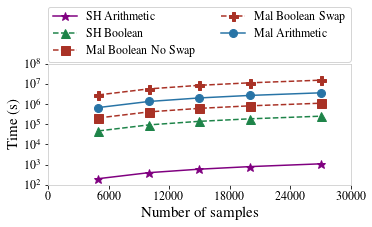

In [71]:
def plot_lr():
    # plt.plot(nrules, nb_vals, marker='o', linestyle='-', color=red)
    # plt.plot(nrules, sb_vals, marker='o', linestyle='-', color=green2)
    plt.yscale('log')
    #x = [1000, 5000, 10000, 15000, 20000, 27000]
    #y1 = [37.95, 200.84, 398.38, 593.94, 795.89, 1093.88]
    x = [5000, 10000, 15000, 20000, 27000]
    y1 = [200.84, 398.38, 593.94, 795.89, 1093.88]
    y2 = [1209.14]
    # Malicious AGMPC without swap
    y3 = [5341.24]
    # Malicious AGMPC with swap
    y4 = [74531.64]
    # Malicious SPDZ
    y5 = [687098.2592,1374183.157,2061272.779,2748374.322,3699731.997]
    
    plt.yscale('log')

    plt.plot(x, y1, linestyle ="solid", marker="*", markersize=9, color=purple, label="SH Arithmetic")
    
    plt.plot(x, [y2[0] * i//128 for i in x],  marker='^', linestyle='--', markersize=9, color=green, label="SH Boolean")
    
    plt.plot(x, [y3[0] * i//128 for i in x],  marker='s', linestyle='--', markersize=9, color=red, label="Mal Boolean No Swap")
    
    plt.plot(x, [y4[0] * i//128 for i in x],  marker='P', linestyle='--', markersize=9, color=red, label="Mal Boolean Swap")
    
    
    plt.plot(x, y5, linestyle = "solid", marker="o", markersize=8, color=blue, label="Mal Arithmetic")
    
    print("Swap", [y4[0] * i//128 for i in x])
    print("SH boolean", [y2[0] * i//128 for i in x])
    print("SH Arithmetic:", y1)
    print("Mal arithmetic: ", y5)
    
    axes = plt.gca()
    axes.set_ylim([0, 16000000])

    plt.legend(ncol=2, columnspacing=0.2, fontsize=12, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0)

    plt.ylabel("Time (s)",fontsize=15)
    plt.yticks([100, 1000, 10000, 100000, 1000000, 10000000, 100000000], fontsize=12)
    
    plt.xlabel("Number of samples", fontsize=15)
    xts = [0, 6000, 12000, 18000, 24000, 30000]

    plt.xticks(xts, ["$0$", "$6000$", "$12000$", "$18000$", "$24000$", "$30000$"], fontsize=12)

    fig = plt.gcf()
    fig.set_size_inches(6, 3.24, forward=True)

    pp = PdfPages('LR.pdf')
    plt.savefig(pp, format='pdf', bbox_inches='tight', dpi=fig.dpi)
    pp.close()
    plt.show()
plot_lr()

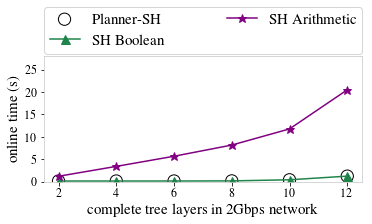

In [53]:
# vary the number of layers
def plot_dt_online_layers():
    #plt.yscale('log')
    x = [2, 4, 6, 8, 10, 12]
    
    #y1 = [0.080831, 0.081916, 0.08518, 0.101131, 0.286841, 0.44538]
    y1 = [0.161667, 0.162492, 0.164376, 0.189442, 0.43564299999999995, 1.24759]

    #y1 = [161.667/1000, 162.492/1000, 164.376/1000, 189.442/1000, 435.643/1000, 1247.59/1000]
    y2 = [1.220982, 3.424202, 5.681093, 8.177048, 11.771117, 20.492758]
    
    # malicious AG-MPC
    # y3 = [0.081, 0.081, 0.084, 0.096, 0.292, 0.469]
    y3 = [0.16150399999999998, 0.162101, 0.16783199999999998, 0.173868, 0.43503699999999995, 1.25414]
    # malicious SCALE-MAMBA
    #y4 = [1223.506, 3610.301, 5851.107, 8626.237, 13409.904, 26633.138]
    y4 = [1.223506,3.610301,5.851107,8.626237,13.409904,26.633138]
    
    y5 = [0.8111826666666662, 3.429572666666666, 6.047962666666666, 8.666352666666667, 11.284742666666665, 13.903132666666666]
    #y6 = [0.1034696666666668, 0.16287666666666678, 0.22228366666666677, 0.28169066666666676, 0.3410976666666667, 0.4005046666666667]
    y6 = [0.15199599510763215, 0.15641969471624273, 0.17411449315068497, 0.24489368688845406, 0.5280104618395304, 1.6604775616438359]

    plt.scatter(x, y1, s=150, label="Planner-SH", facecolors='none', edgecolors='black')
    plt.plot(x, y1, linestyle='solid', marker='^', markersize=9, color=green, label="SH Boolean")
    plt.plot(x, y2, linestyle='solid', marker='*', markersize=9, color=purple, label="SH Arithmetic")
    #plt.plot(x, y3, linestyle='solid', marker='s', markersize=9, color=red, label="Malicious Boolean")
    #plt.plot(x, y4, linestyle='solid', marker='o', markersize=9, color=blue, label="Malicious Arithmetic")
    #plt.plot(x, y5, linestyle='dotted', marker='*', markersize=9, color=blue, label="SH Arithmetic (Model)")
    #plt.plot(x, y6, linestyle='dotted', marker='*', markersize=9, color="#00ffff", label="SH Boolean (Model)")

    axes = plt.gca()
    axes.set_ylim(0, 28)
    #plt.yticks([0.01, 0.1, 1, 10, 100], fontsize=12)
    
    handles, labels = axes.get_legend_handles_labels()
    axes.legend([handles[-1]] + handles[:-1], [labels[-1]] + labels[:-1], ncol=2, columnspacing=0.2, fontsize=15, bbox_to_anchor=(0,1.02,1,4), loc="lower left",
                mode="expand", borderaxespad=0)
    #plt.legend(ncol=2, columnspacing=0.2, fontsize=15, bbox_to_anchor=(0,1.02,1,4), loc="lower left",
                #mode="expand", borderaxespad=0)
    

    plt.ylabel("online time (s)",fontsize=15)
    plt.yticks(np.arange(0, 30,5), fontsize=12)
    plt.xlabel("# complete tree layers in 2Gbps network", fontsize=15)
    xts = [2, 4, 6, 8, 10, 12]
    plt.xticks(xts, ["$2$", "$4$", "$6$", "$8$", "$10$", "$12$"], fontsize=12)

    fig = plt.gcf()
    fig.set_size_inches(6, 3.3, forward=True)

    pp = PdfPages('Exp_4b_dt_online.pdf')
    plt.savefig(pp, format='pdf', bbox_inches='tight', dpi=fig.dpi)
    pp.close()
    plt.show()
    

    
plot_dt_online_layers()



Y5 [17.845647417294387, 19.083687284486274, 20.10523915730029, 21.067956682697282, 22.006316060022954, 22.932258412426332]
Y6 [2.081577111111104, 7.1163121111111005, 12.416299999999982, 17.981540777777756, 23.812034444444414, 29.90778099999995]


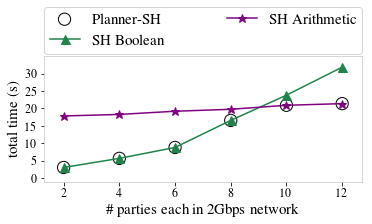

In [54]:
# Vary the number of parties
def plot_dt_total_parties():
    # plt.plot(nrules, nb_vals, marker='o', linestyle='-', color=red)
    # plt.plot(nrules, sb_vals, marker='o', linestyle='-', color=green2)
    # plt.yscale('log')
    x = [2, 4, 6, 8, 10, 12]
    y1 = [3.08403, 5.69959, 8.81866, 16.5831, 23.8162, 31.8367]
    y2 = [17.84773474, 18.29361114, 19.20581401, 19.7670661, 20.91347573, 21.38849034]
    
    y3 = [6.829, 13.973, 24.335, 36.597, 53.923, 71.455]
    # Malicious SCALE-MAMBA
    y4 = [1831.210504, 4693.247791, 8376.946313, 16038.48054, 18215.85027, 25975.47224]
    
    # Estimating SCALE-MAMBA
    y5_offline = [120963.16923076924, 114504.12307692306, 112351.10769230768, 111274.59999999998, 110628.69538461536, 110198.09230769228]
    y5_offline = [(74292+ 649816) / e for e in y5_offline]
    y5_online = [11.859461666666668, 12.759827666666668, 13.660193666666668, 14.560559666666668, 15.460925666666668, 16.361291666666666]
    y5 = [y5_offline[i] + y5_online[i] for i in range(len(y5_offline))]
    
    # Estimating AG-MPC
    y6_offline = [1.6510411111111043, 6.606307777777768, 11.788649999999983, 17.198067777777755, 22.834561111111082, 28.698129999999953]
    y6_online = [0.4305359999999998, 0.510004333333333, 0.6276499999999994, 0.7834729999999991, 0.9774733333333322, 1.2096509999999987]
    y6 = [y6_offline[i] + y6_online[i] for i in range(len(y6_offline))]
    p1 = plt.plot(x, y1, linestyle='solid', marker='^', markersize=9, color=green, label="SH Boolean")
    p2 = plt.plot(x, y2, linestyle='solid', marker='*', markersize=9, color=purple, label="SH Arithmetic")
    #p3 = plt.plot(x, y3, linestyle='solid', marker='s', markersize=9, color=red, label="Malicious Boolean")
    #p4 = plt.plot(x, y4, linestyle='solid', marker='o', markersize=9, color=blue, label="Malicious Arithmetic")
    p5 = plt.scatter(x, [y1[0], y1[1], y1[2], y1[3], y2[4], y2[5]], s=150, facecolors='none', edgecolors='black', label="Planner-SH")
    
    #plt.plot(x, y5, linestyle='dotted', marker='*', markersize=9, color=blue, label="SH Arithmetic (Model)")
    #plt.plot(x, y6, linestyle='dotted', marker='*', markersize=9, color=red, label="SH Boolean (Model)")
    print("Y5", y5)
    print("Y6", y6)
    
    
    axes = plt.gca()
    #axes.set_ylim(0, 26000)
    #plt.yticks([1, 10, 100, 1000, 10000, 100000], fontsize=12)
    axes = plt.gca()
    axes.set_ylim([-1, 35])
    handles, labels = axes.get_legend_handles_labels()
    axes.legend([handles[-1]] + handles[:-1], [labels[-1]] + labels[:-1], ncol=2, columnspacing=0.2, fontsize=15, bbox_to_anchor=(0,1.02,1,4), loc="lower left",
                mode="expand", borderaxespad=0)
    
    #plt.legend(ncol=2, columnspacing=0.2, fontsize=15, bbox_to_anchor=(0,1.02,1,4), loc="lower left",
                #mode="expand", borderaxespad=0)

    plt.ylabel("total time (s)",fontsize=15)
    plt.yticks(np.arange(0,35,5), fontsize=12)
    plt.xlabel("\# parties each in 2Gbps network", fontsize=15)
    xts = [2, 4, 6, 8, 10, 12]
    plt.xticks(xts, ["$2$", "$4$", "$6$", "$8$", "$10$", "$12$"], fontsize=12)

    fig = plt.gcf()
    fig.set_size_inches(6, 3.3, forward=True)

    pp = PdfPages('Exp_5a_dt_offline_online.pdf')
    plt.savefig(pp, format='pdf', bbox_inches='tight', dpi=fig.dpi)
    pp.close()
    plt.show()
plot_dt_total_parties()


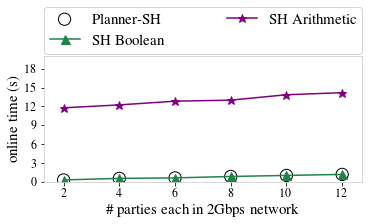

In [55]:
def plot_dt_online_parties():
    #plt.yscale('log')
    x = [2, 4, 6, 8, 10, 12]
    y1 = [0.286841, 0.53484, 0.61241, 0.83911, 1.00558, 1.16675]
    y2 = [11.771117, 12.235296, 12.825783, 12.994068, 13.853691, 14.181069]

    # Malicious Boolean
    y3 = [0.292, 1.388, 2.211, 2.71, 2.72, 2.93]
    
    # Malicious Arithmetic
    # y4 = [13409.904, 14786.003, 14727.769, 16142.821, 18292.122, 18372.763]
    y4 = [13.409904, 14.786003, 14.727769, 16.142821, 18.292122, 18.372763]


    y5 = [11.859461666666668, 12.759827666666668, 13.660193666666668, 14.560559666666668, 15.460925666666668, 16.361291666666666]
    y6 = [0.4305359999999998, 0.510004333333333, 0.6276499999999994, 0.7834729999999991, 0.9774733333333322, 1.2096509999999987]

    
    plt.plot(x, y1, linestyle='solid', marker='^', markersize=9, color=green, label="SH Boolean")
    plt.plot(x, y2, linestyle='solid', marker='*', markersize=9, color=purple, label="SH Arithmetic")
    #plt.plot(x, y3, linestyle='solid', marker='s', markersize=9, color=red, label="Malicious Boolean")
    #plt.plot(x, y4, linestyle='solid', marker='o', markersize=9, color=blue, label="Malicious Arithmetic")
    plt.scatter(x, y1, s=150, facecolors='none', edgecolors='black', label="Planner-SH")
    #plt.plot(x, y5, linestyle='dotted', marker='*', markersize=9, color=red, label="SH Arithmetic (Model)")
    #plt.plot(x, y6, linestyle='dotted', marker='*', markersize=9, color=red, label="SH Boolean (Model)")

    axes = plt.gca()
    #axes.set_ylim([-1, 16])
    axes.set_ylim(0, 20)
    handles, labels = axes.get_legend_handles_labels()
    axes.legend([handles[-1]] + handles[:-1], [labels[-1]] + labels[:-1], ncol=2, columnspacing=0.2, fontsize=15, bbox_to_anchor=(0,1.02,1,4), loc="lower left",
                mode="expand", borderaxespad=0)
    #plt.yticks([0.1, 1, 10, 100, 1000, 10000], fontsize=12)
    #plt.legend(ncol=2, columnspacing=0.2, fontsize=15, bbox_to_anchor=(0,1.02,1,4), loc="lower left",
                #mode="expand", borderaxespad=0)

    plt.ylabel("online time (s)",fontsize=15)
    plt.yticks(np.arange(0,20,3), fontsize=12)
    plt.xlabel("\# parties each in 2Gbps network", fontsize=15)
    xts = [2, 4, 6, 8, 10, 12]
    plt.xticks(xts, ["$2$", "$4$", "$6$", "$8$", "$10$", "$12$"], fontsize=12)

    fig = plt.gcf()
    fig.set_size_inches(6, 3.3, forward=True)

    pp = PdfPages('Exp_5b_dt_online.pdf')
    plt.savefig(pp, format='pdf', bbox_inches='tight', dpi=fig.dpi)
    pp.close()
    plt.show()

plot_dt_online_parties()

In [56]:
def linear_cost(x, linear_cost_eq):
    return linear_cost_eq[0] * x + linear_cost_eq[1]
    
def quadratic_cost(x, quadratic_cost_eq):
    return quadratic_cost_eq[0] * (x**2) + quadratic_cost_eq[1] * x + quadratic_cost_eq[2]

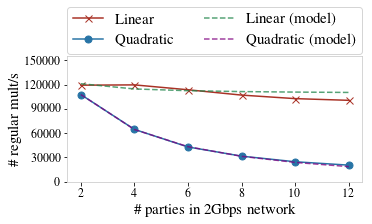

In [57]:
# Fig 8a
def plot_dpi_ictf_1a():
    # plt.plot(nrules, nb_vals, marker='o', linestyle='-', color=red)
    # plt.plot(nrules, sb_vals, marker='o', linestyle='-', color=green2)

    x = [2, 4, 6, 8, 10, 12]
    y1 = [119163, 119523, 113496, 106911, 102568, 100467]
    y2 = [107595, 64583.1, 42891.5, 31573.3, 24661.5, 20484.5]
    
    # linear in terms of (p-1)/p
    linear_transform = (np.array(x[:4]) - 1)/np.array(x[:4])
    linear_cost_model = np.polyfit(linear_transform, y1[:4], 1)
    y3 = [linear_cost((x[i] - 1)/ x[i], linear_cost_model) for i in range(len(x))]
    
    # quadratic in terms of 1/p
    quadratic_transform = 1/np.array(x[:4])
    cost_model_quadratic = np.polyfit(quadratic_transform, y2[:4], 2)
    y4 = [quadratic_cost(1/x[i], cost_model_quadratic) for i in range(len(x))]

    #y3 = [123693.5083, 111777.5609, 108299.8904, 106640.9612, 105669.7764, 105032.0879]
    #y4 = [123379.9794, 61963.79904, 41370.40651, 31050.80861, 24851.70178, 20715.89765]

    plt.plot(x, y1, linestyle='solid', marker='x', markersize=7, color=red, label="Linear")
    plt.plot(x, y2, linestyle='solid', marker='o', markersize=7, color=blue, label="Quadratic")

    plt.plot(x, y3, linestyle='--', alpha=0.75, color=green, label="Linear (model)")
    plt.plot(x, y4, linestyle='--', alpha=0.75, color=purple, label="Quadratic (model)")

    axes = plt.gca()
    axes.set_ylim([0, 155000])

    plt.legend(ncol=2, columnspacing=0.2, fontsize=15, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", mode="expand", borderaxespad=0)
    #handles, labels = axes.get_legend_handles_labels()
    #axes.legend(handles, labels, ncol=2, columnspacing=0.2, fontsize=15, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                #mode="expand", borderaxespad=0)
    plt.ylabel("\# regular mult/s",fontsize=15)
    plt.yticks(np.arange(0, 155000, 30000), fontsize=12)
    plt.xlabel("\# parties in 2Gbps network", fontsize=15)
    xts = [2, 4, 6, 8, 10, 12]
    plt.xticks(xts, ["$2$", "$4$", "$6$", "$8$", "$10$", "$12$"], fontsize=12)

    fig = plt.gcf()
    fig.set_size_inches(6, 3.3, forward=True)

    pp = PdfPages('Exp_1a_protocols_in_diff_parties.pdf')
    plt.savefig(pp, format='pdf', bbox_inches='tight', dpi=fig.dpi)
    pp.close()
    plt.show()

plot_dpi_ictf_1a()

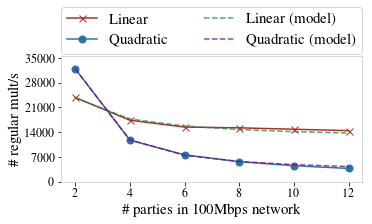

In [58]:
# Fig 8d
def plot_dpi_ictf_1b():
    # plt.plot(nrules, nb_vals, marker='o', linestyle='-', color=red)
    # plt.plot(nrules, sb_vals, marker='o', linestyle='-', color=green2)

    x = [2, 4, 6, 8, 10, 12]
    y1 = [23840.9, 17393.1, 15455, 15237.5, 14838.2, 14442.4]
    y2 = [31945.8, 11774.3, 7602.14, 5661.11, 4531.43, 3761.61]
    
    linear_transform = (np.array(x[:4]) - 1)/np.array(x[:4])
    linear_cost_model = np.polyfit(linear_transform, y1[:4], 1)
    y3 = [linear_cost((x[i] - 1)/ x[i], linear_cost_model) for i in range(len(x))]

    
    # quadratic in terms of 1/p
    quadratic_transform = 1/np.array(x[:4])
    cost_model_quadratic = np.polyfit(quadratic_transform, y2[:4], 2)
    y4 = [quadratic_cost(1/x[i], cost_model_quadratic) for i in range(len(x))]
    
    #y3 = [23883.08158, 17213.69742, 15747.82956, 15104.6939, 14743.42423, 14512.02793]
    #y4 = [27973.11135, 12168.59331, 7775.510469, 5713.010194, 4515.300067, 3732.744795]
            
    plt.plot(x, y1, linestyle='solid', marker='x', markersize=7, color=red, label="Linear")
    plt.plot(x, y2, linestyle='solid', marker='o', markersize=7, color=blue, label="Quadratic")

    plt.plot(x, y3, linestyle='--', alpha=0.75, color=green, label="Linear (model)")
    plt.plot(x, y4, linestyle='--', alpha=0.75, color=purple, label="Quadratic (model)")

    axes = plt.gca()
    # axes.set_xscale("log", basex=2)
    axes.set_ylim([0, 35500])

    plt.legend(ncol=2, columnspacing=0.2, fontsize=15, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", mode="expand", borderaxespad=0)
    #handles, labels = axes.get_legend_handles_labels()
    #axes.legend(handles, labels, ncol=2, columnspacing=0.2, fontsize=15, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                #mode="expand", borderaxespad=0)
    plt.ylabel("\# regular mult/s",fontsize=15)
    plt.yticks(np.arange(0,35500, 7000), fontsize=12)
    plt.xlabel("\# parties in 100Mbps network", fontsize=15)
    xts = [2, 4, 6, 8, 10, 12]
    plt.xticks(xts, ["$2$", "$4$", "$6$", "$8$", "$10$", "$12$"], fontsize=12)

    fig = plt.gcf()
    fig.set_size_inches(6, 3.3, forward=True)
    pp = PdfPages('Exp_1b_protocols_in_diff_parties.pdf')
    plt.savefig(pp, format='pdf', bbox_inches='tight', dpi=fig.dpi)
    pp.close()
    plt.show()
plot_dpi_ictf_1b()

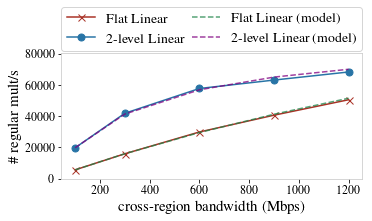

In [59]:
def plot_hierarchical():
    # plt.plot(nrules, nb_vals, marker='o', linestyle='-', color=red)
    # plt.plot(nrules, sb_vals, marker='o', linestyle='-', color=green2)
    x = [100, 300, 600, 900, 1200]
    y1 = [5604.99, 15929.2, 29906.6, 40677.5, 50590.5]
    y2 = [19748.3, 41918.4, 57814.5, 63222.2, 68404.7]

    
    flat_model = np.polyfit(1/np.array(x[:4]), 1/np.array(y1[:4]), 1)
    two_level_model = np.polyfit(1/np.array(x[:4]), 1/np.array(y2[:4]), 1)
    y3 = [1/(flat_model[0] * (1/e) + flat_model[1]) for e in x]
    
    y4 = [1/(two_level_model[0] * 1/e + two_level_model[1]) for e in x]
    #y3 = [5606.683377, 15915.24037, 29453.84183, 41111.17604, 51253.88874]
    #y4 = [19796.28246, 41277.76205, 56644.3359, 64669.18844, 69599.28412]

    plt.plot(x, y1, linestyle='solid', marker='x', markersize=7, color=red, label="Flat Linear")
    plt.plot(x, y2, linestyle='solid', marker='o', markersize=7, color=blue, label="2-level Linear")
    plt.plot(x, y3, linestyle='--', alpha=0.75, color=green, label="Flat Linear (model)")
    plt.plot(x, y4, linestyle='--', alpha=0.75, color=purple, label="2-level Linear (model)")

    axes = plt.gca()
    axes.set_ylim([-100, 80500])

    plt.legend(ncol=2, columnspacing=0.2, fontsize=14, bbox_to_anchor=(0,1.02,1,4), loc="lower left", mode="expand", borderaxespad=0)
    #handles, labels = axes.get_legend_handles_labels()
    #axes.legend(handles, labels, ncol=2, columnspacing=0.2, fontsize=15, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                #mode="expand", borderaxespad=0)
    plt.ylabel("\# regular mult/s",fontsize=15)
    plt.yticks(np.arange(0,80500,20000), fontsize=12)
    plt.xlabel("cross-region bandwidth (Mbps)", fontsize=15)
    xts = [200, 400, 600, 800, 1000, 1200]
    plt.xticks(xts, ["$200$", "$400$", "$600$", "$800$", "$1000$", "$1200$"], fontsize=12)

    fig = plt.gcf()
    fig.set_size_inches(6, 3.3, forward=True)

    pp = PdfPages('Exp_7b_9_3.pdf')
    plt.savefig(pp, format='pdf', bbox_inches='tight', dpi=fig.dpi)
    pp.close()
    plt.show()
plot_hierarchical()

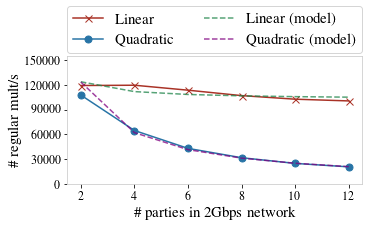

In [60]:
#!/usr/bin/env python

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib
# import seaborn as sns
import sys
import datetime
import glob
from itertools import cycle
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import FixedLocator
from matplotlib.ticker import FixedFormatter
# %matplotlib inline

import warnings
import matplotlib.cbook
import matplotlib as mpl
import random

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath,mathptmx}']

warnings.filterwarnings('ignore')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams.update({'figure.max_open_warning': 0})
mpl.rcParams.update({"font.size": 34,"figure.autolayout": True})
mpl.rc("axes", edgecolor="0.8")
plt.rcParams["font.family"] = "Times New Roman"

legendsize = 40

red = "#a93226"
blue = "#2874a6"
green = "#1e8449"

purple = '#800080'

def plot_dpi_ictf():
    # plt.plot(nrules, nb_vals, marker='o', linestyle='-', color=red)
    # plt.plot(nrules, sb_vals, marker='o', linestyle='-', color=green2)

    x = [2, 4, 6, 8, 10, 12]
    y1 = [119163, 119523, 113496, 106911, 102568, 100467]
    y2 = [107595, 64583.1, 42891.5, 31573.3, 24661.5, 20484.5]

    y3 = [123693.5083, 111777.5609, 108299.8904, 106640.9612, 105669.7764, 105032.0879]
    y4 = [123379.9794, 61963.79904, 41370.40651, 31050.80861, 24851.70178, 20715.89765]

    plt.plot(x, y1, linestyle='solid', marker='x', markersize=7, color=red, label="Linear")
    plt.plot(x, y2, linestyle='solid', marker='o', markersize=7, color=blue, label="Quadratic")

    plt.plot(x, y3, linestyle='--', alpha=0.75, color=green, label="Linear (model)")
    plt.plot(x, y4, linestyle='--', alpha=0.75, color=purple, label="Quadratic (model)")

    axes = plt.gca()
    axes.set_ylim([0, 155000])

    plt.legend(ncol=2, columnspacing=0.2, fontsize=15, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0)

    plt.ylabel("\# regular mult/s",fontsize=15)
    plt.yticks(np.arange(0, 155000, 30000), fontsize=12)
    plt.xlabel("\# parties in 2Gbps network", fontsize=15)
    xts = [2, 4, 6, 8, 10, 12]
    plt.xticks(xts, ["$2$", "$4$", "$6$", "$8$", "$10$", "$12$"], fontsize=12)

    fig = plt.gcf()
    fig.set_size_inches(6, 3.33, forward=True)

    pp = PdfPages('Exp_1a_protocols_in_diff_parties.pdf')
    plt.savefig(pp, format='pdf', bbox_inches='tight', dpi=fig.dpi)
    pp.close()
    plt.show()



plot_dpi_ictf()